In [34]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import statsmodels.api as sm
import statsmodels.api as sm
from patsy import dmatrices

In [35]:
fund1 = pd.read_excel('FundAte4.xls', header = 1) #fonte: CNI
fund1.columns = ['data', 'indice']
fund2 = pd.read_excel('Fund5a8.xls', header = 1)
fund2.columns = ['data', 'indice']
medio = pd.read_excel('medio.xls', header = 1)
medio.columns = ['data', 'indice']
superior = pd.read_excel('superior.xls', header = 1)
superior.columns = ['data', 'indice']

In [36]:
#Modelo de carregamento
i = 0
E = []
for e in range(0, len(fund1) - 1):
    E.append((fund1.indice[i + 1] - fund1.indice[i])/fund1.indice[i])
    i += 1

In [37]:
regmatrix = pd.DataFrame({'fund1_indice': fund1.indice[:45], 'E': E})

In [38]:
y, X = dmatrices('fund1_indice ~ E', data = regmatrix, return_type = 'dataframe')
fund1_model = sm.OLS(y, X)
res = fund1_model.fit()
res.pvalues[1]

0.0424961350135756

In [39]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           fund1_indice   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.371
Date:                Thu, 10 Jun 2021   Prob (F-statistic):             0.0425
Time:                        21:43:36   Log-Likelihood:                -123.36
No. Observations:                  45   AIC:                             250.7
Df Residuals:                      43   BIC:                             254.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.0125      0.573     90.829      0.0

In [40]:
sm.stats.linear_rainbow(res)

(1.224941273942991, 0.32555776137077075)

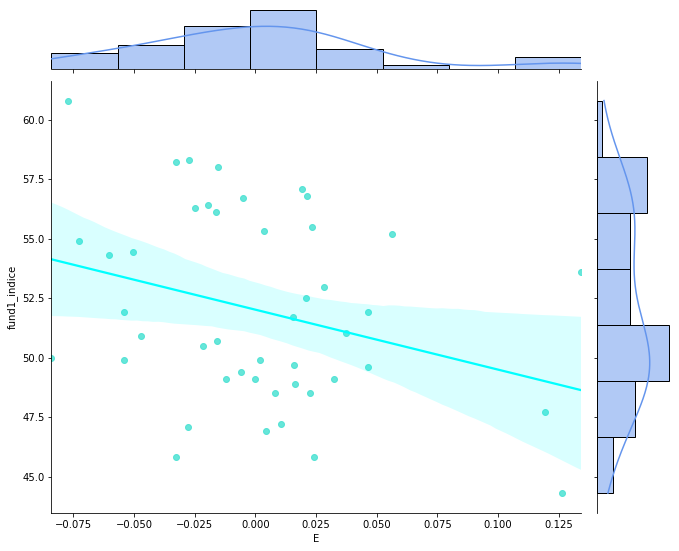

In [42]:
grid = sns.jointplot(x = 'E', y = 'fund1_indice', data = regmatrix, kind = 'reg', scatter_kws={"color": "turquoise"}, 
              line_kws={"color": "aqua"}, marginal_kws={'color': 'cornflowerblue'}, ratio = 6)
grid.fig.set_figheight(8)
grid.fig.set_figwidth(10)

In [33]:
u = np.random.normal(0, 12.054)